# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269'

In [5]:
# Get weather data
City_name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_speed = []

record = 1

In [6]:
response = requests.get(f"{url}&q=London").json() 
print(response)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.85, 'pressure': 1002, 'humidity': 80, 'temp_min': 35.6, 'temp_max': 44.01}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 240}, 'rain': {'1h': 0.25}, 'clouds': {'all': 0}, 'dt': 1551774050, 'sys': {'type': 1, 'id': 1414, 'message': 0.0063, 'country': 'GB', 'sunrise': 1551767821, 'sunset': 1551808070}, 'id': 2643743, 'name': 'London', 'cod': 200}


In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
#print("Data Retrieval Complete  ")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=togur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=mount isa
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=illoqqortoormiut
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=assiniboia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=toliary
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=busselton
http://api.openweathermap.org/data/2.5/weathe

city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=staryy nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=tabiauea
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=barentsburg
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=dodoma
http://api.openweathermap.org/data/2.5/weather?units=Im

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=mbeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=sitborice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=amderma
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=odweyne
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=shahgarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=salym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=witu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=nagapattinam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=burica
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=busko-zdroj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=majene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=haibowan
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=xuddur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cc

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=ladario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=olga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=narsipatnam


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=englewood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=tabukiniberu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=onguday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=karaul
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=gorno-chuyskiy
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=mandiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb9d3cce78026c54e2f2b46358ce6269&q=zhumadian
http://api.openweathermap.org/data/2.5/weather?un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame(city_data)

city_df = city_df [["city","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
city_df.head()

,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,pacific grove,20,76,36.62,53.01,4.70
1,qaanaaq,44,89,77.48,-7.46,5.39
2,bluff,76,53,-23.58,84.08,10.20
3,mahebourg,40,62,-20.41,87.80,9.17
4,togur,64,78,58.36,24.68,17.47


In [9]:
city_df = pd.DataFrame(city_data)
 
city_df = city_df [["city","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
city_df.head()

,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,pacific grove,20,76,36.62,53.01,4.70
1,qaanaaq,44,89,77.48,-7.46,5.39
2,bluff,76,53,-23.58,84.08,10.20
3,mahebourg,40,62,-20.41,87.80,9.17
4,togur,64,78,58.36,24.68,17.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

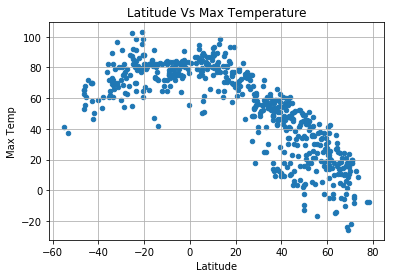

In [12]:
# Latitude Vs Max Temperature plot
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("images/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

#### Latitude vs. Humidity Plot

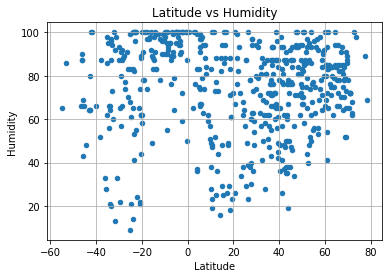

In [15]:
# latitude vs Humidity
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)

plt.savefig("images/Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

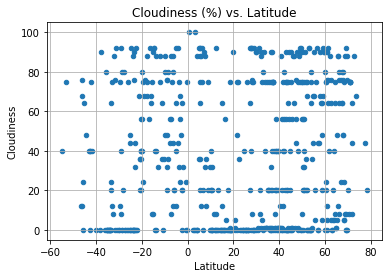

In [16]:
# Cloudiness (%) vs. Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)
 
plt.savefig("images/Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

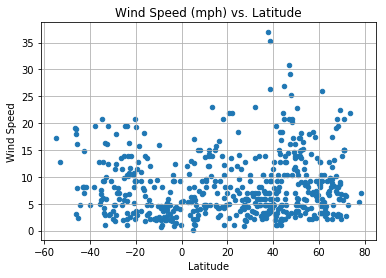

In [17]:
# Wind Speed (mph) vs. Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 


plt.savefig("images/Wind_Speed_vs_Latitude.png")
plt.show()